<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification

In this notebook we're going to cover:
* Architecture of a classifcation model
* The input shapes and output shapes
* Types of classification problems: binary, multiclass, multilabel
* Creating custom data to view and fit
* Steps in modeling: creating a model, compiling a model, fitting a model, evaluating a model
* The power of non-linearity
* Evaluating classification models

# Creating and Viewing Classification Data

In [ ]:
# load libraries
from sklearn.datasets import make_circles
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create classification data
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [ ]:
# check data
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
# make dataframe
circles = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


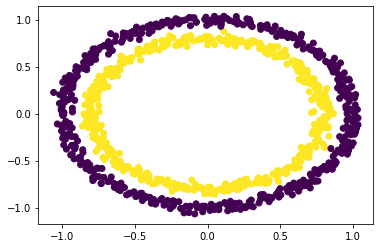

In [ ]:
# plot data
plt.scatter(circles["X0"], circles["X1"], c=circles["label"])
plt.show()

# Input and Output Shapes

In [ ]:
# check shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# check samples
len(X), len(y)

(1000, 1000)

In [ ]:
# see a sample
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Create Initial Model

In [ ]:
# create model
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(None, 1))
])

model_0.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_0.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.7406 - accuracy: 0.4925
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7410 - accuracy: 0.4992
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.4961
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4986
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5012


In [ ]:
# what if we train it for longer?
model_0.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)
model_0.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934648752212524, 0.5]

In [ ]:
# what if we add more layers?
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(None, 1)),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934061050415039, 0.5]

# Improving The model

In [ ]:
# classification requires sigmoid activation
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5120


[0.6899594664573669, 0.5120000243186951]

In [ ]:
# further improve by adding layers and changing optimizer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000


[0.003930557984858751, 1.0]

# Non-Linearity

In [ ]:
# create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

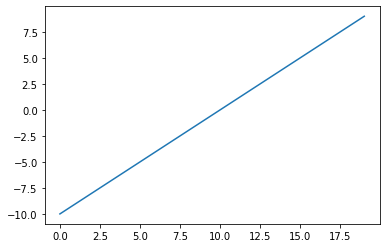

In [ ]:
# visualize the tensor
plt.plot(A);

In [ ]:
# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

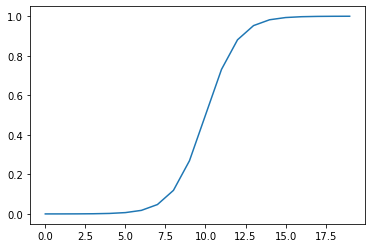

In [ ]:
# visualize the sigmoid tensor
plt.plot(sigmoid(A));

In [ ]:
# how about the relu function?
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

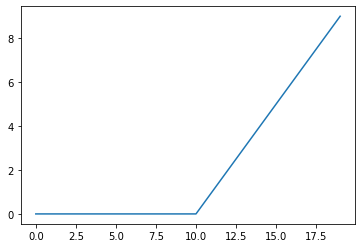

In [ ]:
# visualize the relu function
plt.plot(relu(A));